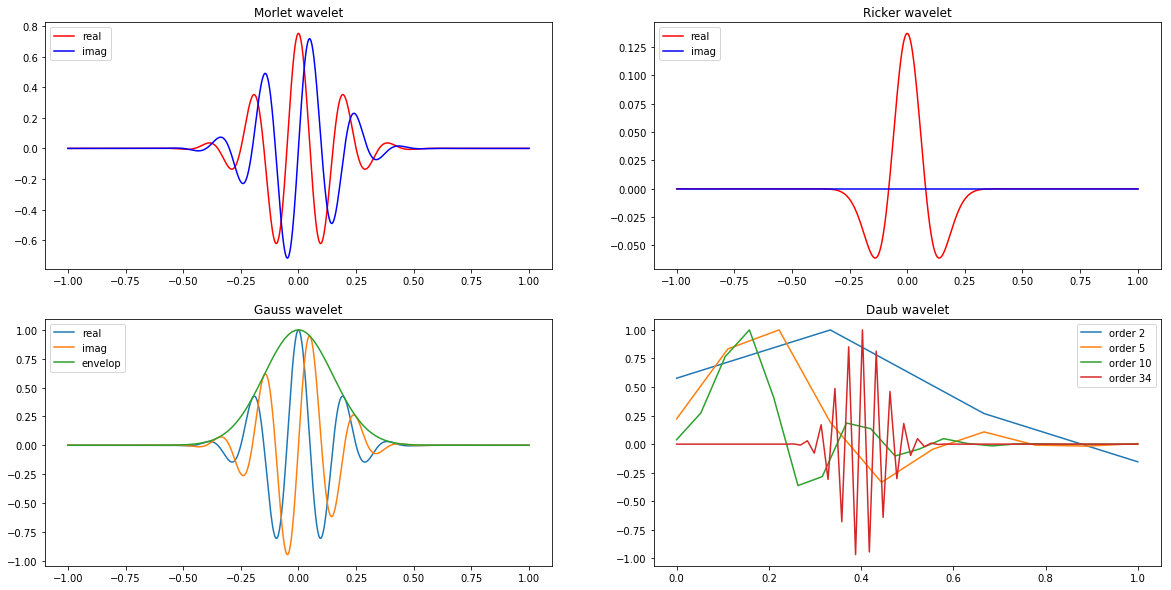

In [83]:
from scipy.signal import morlet, ricker, gausspulse, daub
import numpy as np
from matplotlib import pyplot as plt

N_SAMPLES = 1000
fig = plt.figure()
fig.set_size_inches(20, 10)

morlet_fig = fig.add_subplot(221)
morlet_sample = morlet(N_SAMPLES)
morlet_x = np.linspace(-1, 1, N_SAMPLES)
morlet_fig.plot(morlet_x, morlet_sample.real, color="red")
morlet_fig.plot(morlet_x, morlet_sample.imag, color="blue")
morlet_fig.legend(['real', 'imag'], loc='upper left')    
morlet_fig.set_title("Morlet wavelet")


ricker_fig = fig.add_subplot(222)
ricker_sample = ricker(N_SAMPLES, 40)
ricker_x = np.linspace(-1, 1, N_SAMPLES)
ricker_fig.plot(ricker_x, ricker_sample.real, color="red")
ricker_fig.plot(ricker_x, ricker_sample.imag, color="blue")
ricker_fig.legend(['real', 'imag'], loc='upper left')    
ricker_fig.set_title("Ricker wavelet")

gauss_fig = fig.add_subplot(223)
gauss_x = np.linspace(-1, 1, N_SAMPLES)
gauss_sample_r, gauss_sample_i, gauess_sample_e = gausspulse(gauss_x, fc=5, retquad=True, retenv=True)
gauss_fig.plot(gauss_x, gauss_sample_r, 
               gauss_x, gauss_sample_i, 
               gauss_x, gauess_sample_e)
gauss_fig.legend(['real', 'imag', 'envelop'], loc='upper left') 
gauss_fig.set_title('Gauss wavelet')

daub_fig = fig.add_subplot(224)
dims = [2, 5, 10, 34]
for dim in dims:
    daub_sample = daub(dim)
    daub_sample =  daub_sample/daub_sample.max()
    daub_x = np.linspace(0, 1, len(daub_sample))
    daub_fig.plot(daub_x, daub_sample)
daub_fig.legend([f'order {dim}' for dim in dims], loc='upper right')
daub_fig.set_title('Daub wavelet')
fig.savefig('wavelets.png')

plt.show()